In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore') # change to action='once' if want to see warning once

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.grid_search import GridSearchCV   


In [2]:
pwd

'C:\\Users\\manju\\Desktop\\Springboard\\ultimate_challenge'

In [3]:
filepath = ('data/logins.json')

In [4]:
file= (open(filepath,'r'))

In [5]:
# load json as string
json.load((open('data/logins.json')))

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [6]:
file_content= file.read()
file.close()
data = json.loads(file_content)

login_data = json_normalize(data, record_path='login_time')
# set the column name to date
login_data.columns = ['login_time']
# add a column 'timestamp_ctr' to count the entry
login_data['timestamp_ctr'] = 1
# convert date column to pandas datetime 
login_data['login_time'] = pd.to_datetime(login_data['login_time'])
# set date column as index
login_data.set_index('login_time', inplace=True)


In [7]:
login_data.head()

,timestamp_ctr
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [8]:
login_data.resample('15T').sum().head()

,timestamp_ctr
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [9]:
def resample(df, time_interval):
    """
    Resamples the given dataframe based on the value ofthe time_interval
    """
    # resample the dataframe 
    resampled = df.resample(time_interval).count()
    return resampled

def timestamp_plot(df, axis, title, y_label='', colors=''):
    """
    Arguments:
    df: A dataframe
    axis: location of subplot
    title: title of subplot
    y_label: y label of subplot
    """
    plt.subplot(axis)
    plt.plot(df['timestamp_ctr'],colors)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()

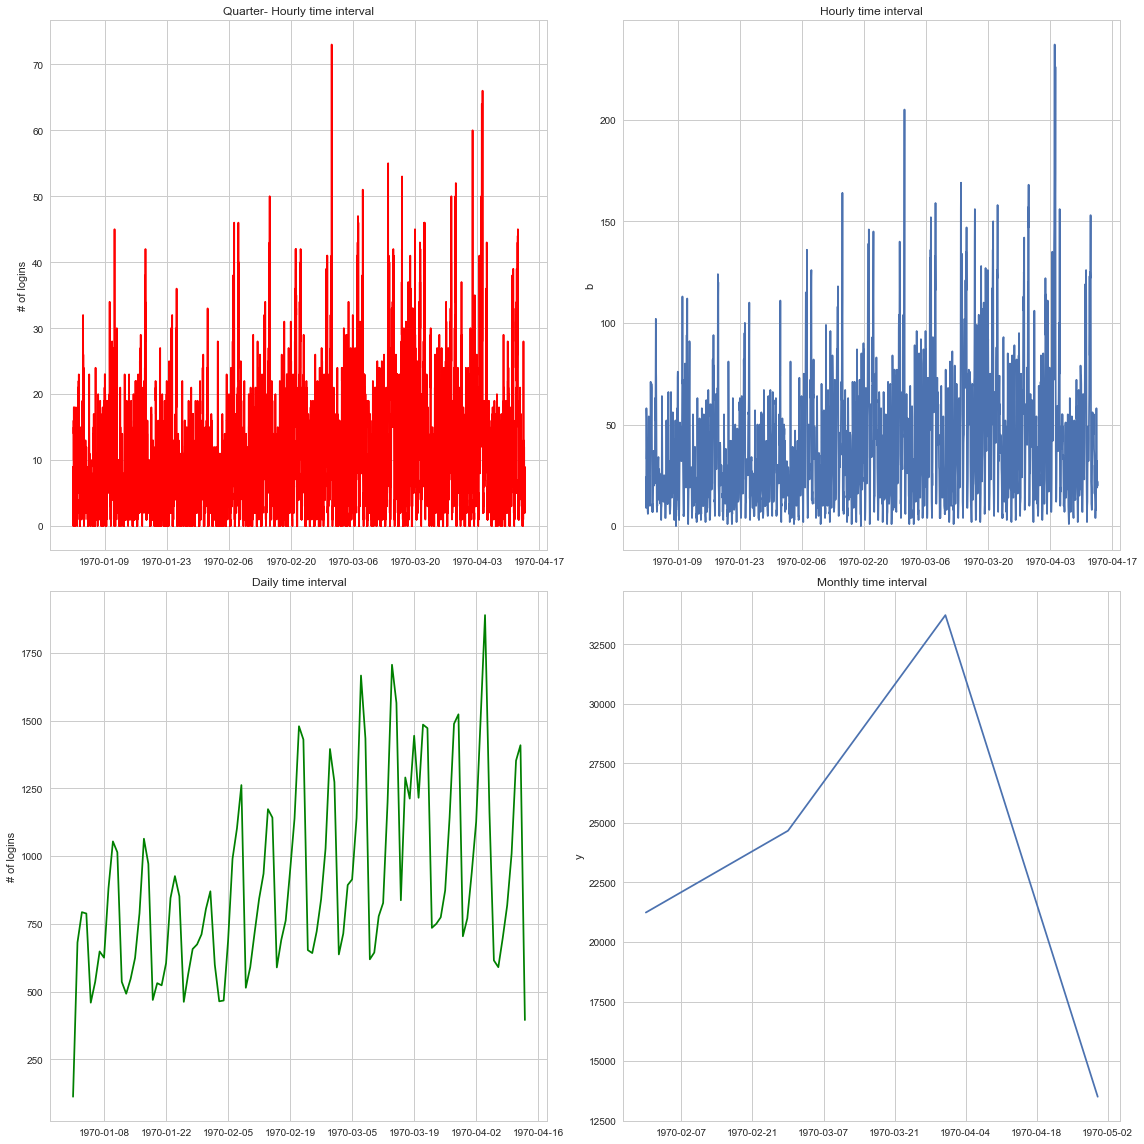

In [10]:
quarter_hourly = resample(login_data, '15T')
hourly = resample(login_data, '60T')
daily =  resample(login_data, 'D')
monthly = resample(login_data, 'M')
plt.figure(figsize=(16,16))

# Quarter_hourly
timestamp_plot(quarter_hourly, 221, "Quarter- Hourly time interval", "# of logins", 'r')

# Hourly
timestamp_plot(hourly, 222, "Hourly time interval",'b')

# Daily
timestamp_plot(daily, 223, "Daily time interval", "# of logins" ,'g')

# Monthly
timestamp_plot(monthly, 224, "Monthly time interval", 'y')
plt.show()



A look at the quarter hourly  and hourly  graphs show that there is a pattern in the peaks. There appears to be  a  pattern of intermittent spikes with 4-5 spikes for each month, though  it is difficult to pinpoint a cause
A way forward would be to check for each of the months separately

In [11]:
login_data.reset_index(inplace=True)

In [12]:
jan_login = login_data[login_data['login_time'] < '1970-02']
feb_login = login_data[(login_data['login_time'] > '1970-02') & 
                            (login_data['login_time'] < '1970-03')]
mar_login = login_data[(login_data['login_time'] > '1970-03') & 
                             (login_data['login_time'] < '1970-04')]
apr_login = login_data[login_data['login_time'] > '1970-04']


jan_login.set_index('login_time', inplace=True)
jan_quarter_hourly = resample(jan_login, '15T')

feb_login.set_index('login_time', inplace=True)
feb_quarter_hourly = resample(feb_login, '15T')

mar_login.set_index('login_time', inplace=True)
mar_quarter_hourly = resample(mar_login, '15T')

apr_login.set_index('login_time', inplace=True)
apr_quarter_hourly = resample(apr_login, '15T')

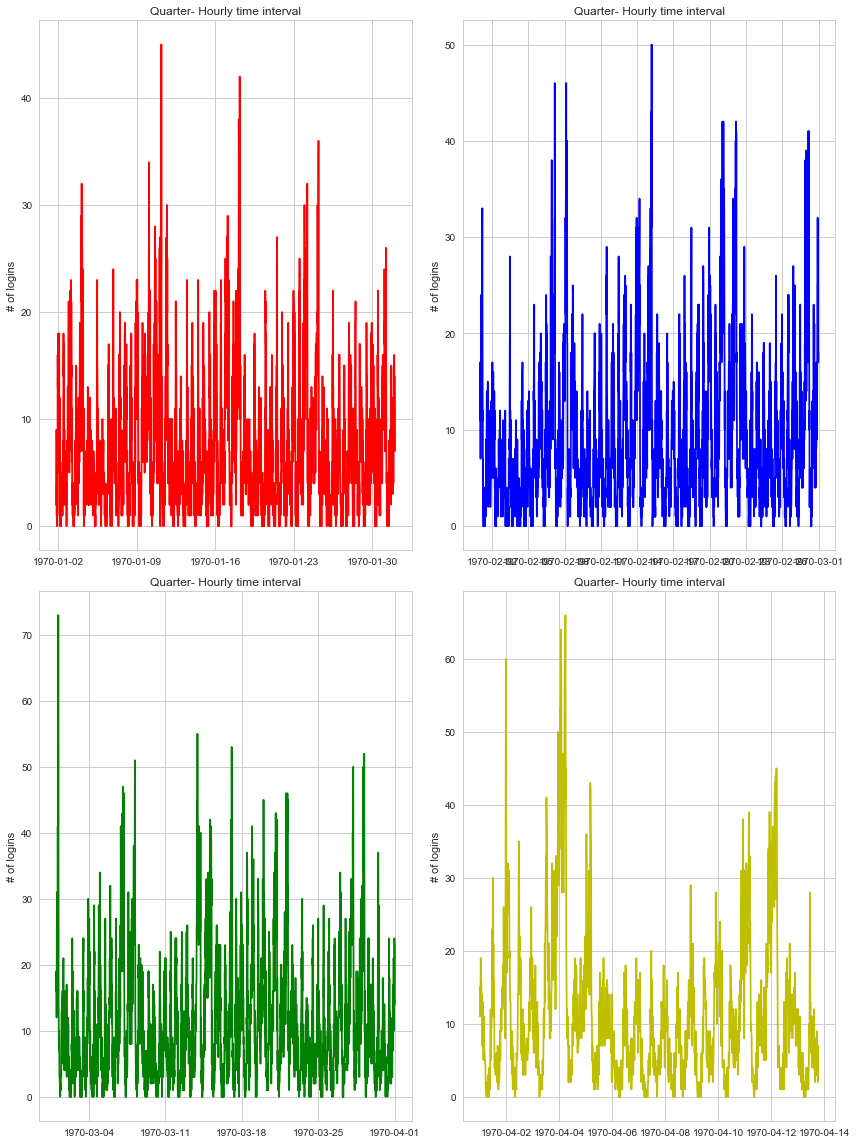

In [13]:
plt.figure(figsize=(12,16))

# Quarter_hourly
timestamp_plot(jan_quarter_hourly, 221, "Quarter- Hourly time interval", "# of logins",'r')
timestamp_plot(feb_quarter_hourly, 222, "Quarter- Hourly time interval", "# of logins",'b')
timestamp_plot(mar_quarter_hourly, 223, "Quarter- Hourly time interval", "# of logins",'g')
timestamp_plot(apr_quarter_hourly, 224, "Quarter- Hourly time interval", "# of logins",'y')

Looking at each month, the peaks can be associated with the weeks, indicating that the  login follows a weekly pattern, maybe with specific dip and peaks for weekdays and weekends.

# Part 2 ‐ Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats

Data points :
    *  Cities of  Gotham and Metropolis have opposite active hours on weekdays. 
    *  Gotham is active at night and Metropolis is active in day time. It could be that Metropolis is business area having many
       offices where people come in day time to work.And Gotham might have an attractive night life .So apparently the direction 
       of commute in morning will most likely be  from Gotham to Metropolis and vice versa during night.
    *  During weekends both cities are reasonably active.
    *  Because of the two way toll between the cities the driver partners don't prefer to commute from one city to another.
       The authorities in this experiment are planning to reimburse the toll costs in a bid to encourage the driver partners to
       stop restricting themselves from shuttling between the two cities  only because there is a toll road in between. So if 
       their experiment is a success, there should be an increased shuttle between the two cities once the toll  fare 
       reimbursement rule comes into effect .


a) The key measure of success of this experiment is the rate of increase in toll gate usage, once implemented.
b) A simple metric would be to compare the frequency of the toll usage  before the toll fee reimbursement is introduced  and 
   after. If there is an increase in toll gate  usage, it indicates that the driver partners no longer restrict themslves to one 
   city. 

In order to carry out the experiment, the toll gate usage is measured. The test statistic is the  average toll gate usage  per unit time  before/after the tollfee waiver. 

H0 hypothesis: Toll reimbursements has no impact on driver partners servicing both cities during weekend.
HA hypothesis: Toll reimbursements has positive impact on driver partners servicing both cities during weekend.

Results:
If the p-value is less than 0.05, then there exist a difference between the number of toll crossings before and after the toll removal. By using a 95% confidence level, we can quantify how much of a difference there is.

If the difference is positive, then there is no significant difference with fee waiver and driver partners are not crossing driving between the two cities with a preference to stay within their city.

If difference is negative, then the number of toll crossings is higher post toll wiaver and driver partners are driving  more between the cities.

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

•	1.	Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
•	2.	Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
•	3.	Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).




Data Description

•	city: city this user signed up in
•	phone: primary device for this user
•	signup_date: date of account registration; in the form ‘YYYY MM DD’
•	last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
•	avg_dist: the average distance in miles per trip taken in the first 30 days after signup
•	avg_rating_by_driver: the rider’s average rating over all of their trips
•	avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
•	surge_pct: the percent of trips taken with surge multiplier > 1
•	avg_surge: The average surge multiplier over all of this user’s trips
•	trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
•	ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
•	weekday_pct: the percent of the user’s trips occurring during a weekday


In [14]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from collections import Counter

In [15]:
pwd

'C:\\Users\\manju\\Desktop\\Springboard\\ultimate_challenge'

In [16]:
filepath = ('data/ultimate_data_challenge.json')
file =( open(filepath,'r'))

In [17]:
file_content = file.read()
file.close()
rider_data = json.loads(file_content)
rider_data = pd.DataFrame(rider_data)

In [18]:
rider_data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [19]:
rider_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are 50,000 observations with 12 features

In [20]:
rider_data.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
last_trip_date            False
phone                      True
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
dtype: bool

'avg_rating_by_driver','avg_rating_of_driver'and 'phone' have null values

In [21]:
rider_data.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00


# Cleanup of Data

In [22]:
# Handling Null values in the columns avg_rating_by_driver,avg_rating_of_driver and phone
rider_data['last_trip_date'] = pd.to_datetime(rider_data['last_trip_date'], format='%Y-%m-%d')
rider_data['signup_date'] = pd.to_datetime(rider_data['signup_date'], format='%Y-%m-%d')

np.mean(rider_data.avg_rating_by_driver)


4.778158195947439

In [23]:
np.mean(rider_data.avg_rating_of_driver)

4.6015592912744685

In [24]:
Counter(rider_data.avg_rating_by_driver).most_common(1)

[(5.0, 28508)]

In [25]:
Counter(rider_data.avg_rating_of_driver).most_common(1)

[(5.0, 20771)]

In [26]:
rider_data.avg_rating_by_driver.fillna(5,inplace=True)
rider_data.avg_rating_of_driver.fillna(5,inplace=True)
rider_data.phone.fillna("Other",inplace=True)

The  dependent variable is the active/ non- active status of the user in the system. Active users are the  ones who have used the service  in the 30 days cycle preceding the date the data was pulled out from the system. Since the date of pullout is not specified, it can be assumed that the latest date appearing in the column 'last_trip_date' can be taken as day on which the data was taken from the system

In [27]:
#latest date appearing in the column 'last_trip_date' which can be taken as the day on which  data was pulled from the system
np.max(rider_data.last_trip_date)

Timestamp('2014-07-01 00:00:00')

In [28]:
rider_data['active_status'] = np.where(rider_data['last_trip_date'] >= "2014-06-01",1,0) 
     

In [29]:
rider_data

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_status
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1
6,3.95,4.0,5.0,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0
9,2.37,5.0,5.0,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0


In [30]:
# Calculate the % of users who were active riders 

pd.to_numeric(rider_data['active_status'].astype(str).astype(int))
rider_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active_status             50000 non-null int32
dtypes: bool(1), datetime64[ns](2), float64(6), int32(1), int64(1), object(2)
memory usage: 4.4+ MB


In [31]:
pcnt_active_status = rider_data['active_status'].sum() /len(rider_data) * 100
pcnt_active_status

37.608000000000004

#  Exploratory Data Analysis

In [32]:
# Create dataframe for city and trips
trips_city = (rider_data[['trips_in_first_30_days', 'city', 'phone']].groupby('city').sum().reset_index())
trips_city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


Text(0.5,1,'Trips vs. City')

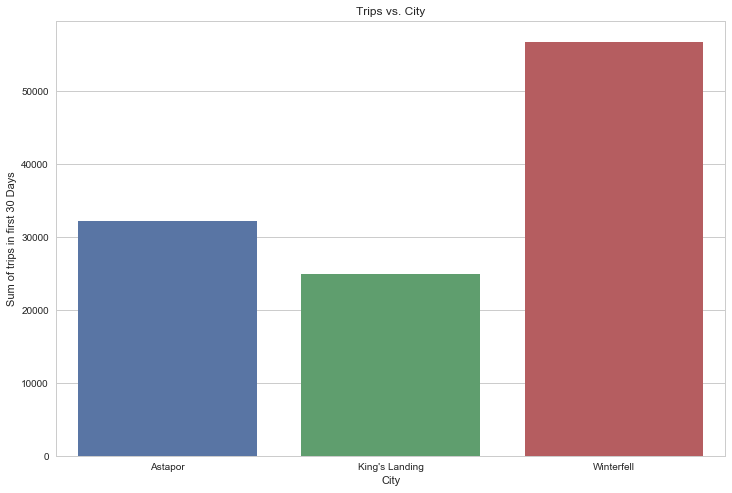

In [33]:
# Constructing barplot
ax = plt.figure(figsize=(12,8))
sns.barplot(x='city', y='trips_in_first_30_days', data=trips_city)
plt.ylabel('Sum of trips in first 30 Days')
plt.xlabel('City')
plt.title('Trips vs. City')

Users from Winterfell seem to be using 'Ultimate's ' services more than users from other cities

In [35]:
# Create dataframe for phone and trips
trips_phone= rider_data[['trips_in_first_30_days', 'city', 'phone']].groupby('phone').sum().reset_index()
trips_phone

,phone,trips_in_first_30_days
0,Android,29067
1,Other,949
2,iPhone,83894


Text(0.5,1,'Trips vs. PhoneType')

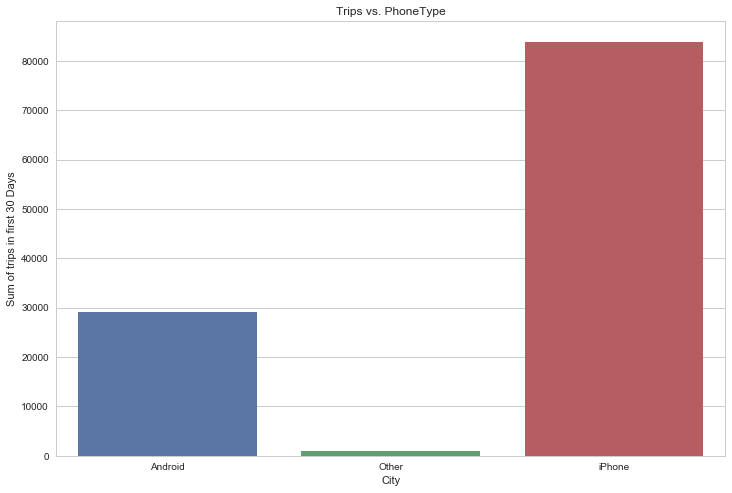

In [36]:
ax = plt.figure(figsize=(12,8))
sns.barplot(x='phone', y='trips_in_first_30_days', data=trips_phone)
plt.ylabel('Sum of trips in first 30 Days')
plt.xlabel('City')
plt.title('Trips vs. PhoneType')

iPhone users seem to have embraced the 'Ultimate' app more than Android users. Maybe  more features are required to increase 
the user friendliness of Android app

Since the users have been classified into Active users and Dormant users, it makes sense to check for any pattern in these two categories

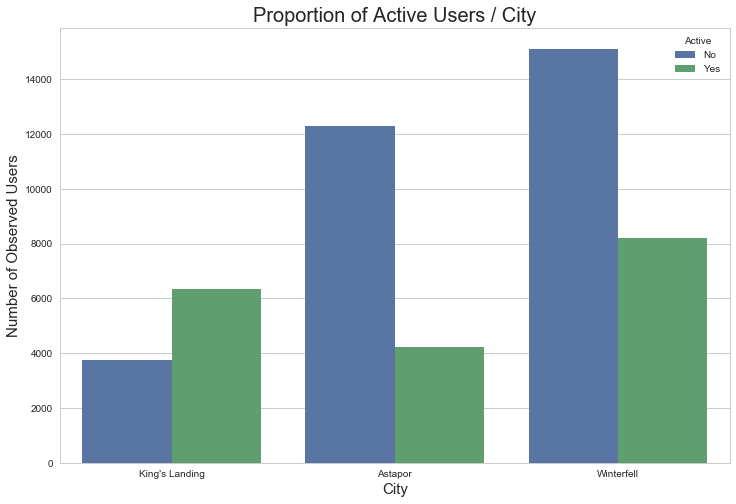

In [37]:
# let's first take a look at features as they relate to 'active_status'
# what is the distribution of active users in each city?

ax = plt.figure(figsize=(12,8))
grph = sns.countplot(x='city', hue='active_status', data=rider_data)
plt.title('Proportion of Active Users / City', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Number of Observed Users', fontsize=15)

# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(grph.legend(title='Active').texts, new_labels): t.set_text(l)
plt.show();

Though Winterfell had more eager embracers in the first 30 days(maybe there was a promotional offer), King's Landing seems to  be the city that  retained more users than the other two

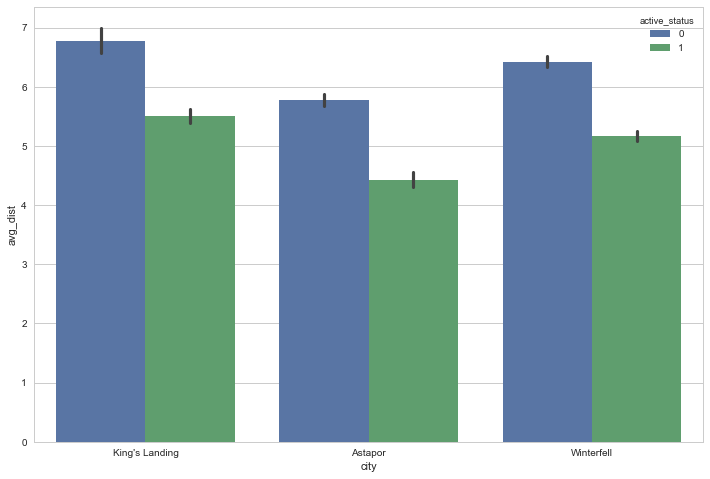

In [38]:
# Checking for a pattern in the 'average distance'  the users travel with the service
ax = plt.figure( figsize =(12,8))
grph = sns.barplot(x='city', y= 'avg_dist',hue ='active_status' ,data=rider_data)


In all the 3 cities, it can be seen that the average distance travelled by Active users is less than the trips done by now dormant users. It could be that dormant users signed up to  make one  long distance trip on a requirement basis and are not daily commuters

# Predictive Modeling

In [39]:
labelEncoder = LabelEncoder()
hotEncoder = OneHotEncoder(sparse=False)

city_encoder = labelEncoder.fit_transform(rider_data.city)
city_encoder = city_encoder.reshape(len(rider_data),1)
onehot_encoder = hotEncoder.fit_transform(city_encoder)
city_df = pd.DataFrame(onehot_encoder,columns=labelEncoder.classes_,dtype='int64')

phone_encoder = labelEncoder.fit_transform(rider_data.phone)
phone_encoder = phone_encoder.reshape(len(rider_data),1)
onehot_encoder = hotEncoder.fit_transform(city_encoder)
phone_df = pd.DataFrame(onehot_encoder,columns=labelEncoder.classes_,dtype='int64')

In [40]:
feature_df = rider_data.copy()

In [41]:
city_df.head()

,Astapor,King's Landing,Winterfell
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1


In [42]:
phone_df.head()

,Android,Other,iPhone
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1


In [43]:
feature_df.index = np.arange(0,len(feature_df.index))
feature_df = feature_df.join(city_df)
feature_df = feature_df.join(phone_df)
feature_df.ultimate_black_user = [int(item) for item in feature_df.ultimate_black_user]

In [44]:
feature_df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_status,Astapor,King's Landing,Winterfell,Android,Other,iPhone
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1,0,1,0,0,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0,1,0,0,1,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1,0,1,0,0,1,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0,0,0,1,0,0,1
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,1,100.0,1,0,0,1,0,0,1
6,3.95,4.0,5.0,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,0,100.0,0,1,0,0,1,0,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,0,100.0,0,0,0,1,0,0,1
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,0,100.0,0,0,0,1,0,0,1
9,2.37,5.0,5.0,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,0,0.0,0,0,0,1,0,0,1


The columns 'city' and ' phone' can be dropped as  they have been one-hot-encoded. 'last_trip_date' can be dropped as it was used to label active_status  column, which is the dependent variable . 'signup_date' can be dropped as all the users have signed up during the month of January.

In [45]:
feature_df.drop(['city','phone','last_trip_date','signup_date'],axis=1,inplace=True)

In [46]:
feature_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_status,Astapor,King's Landing,Winterfell,Android,Other,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1,0,1,0,0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,1,0,0,1,0,0
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,0,1,0,0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,0,1,0,0,1


In [47]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 15 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
active_status             50000 non-null int32
Astapor                   50000 non-null int64
King's Landing            50000 non-null int64
Winterfell                50000 non-null int64
Android                   50000 non-null int64
Other                     50000 non-null int64
iPhone                    50000 non-null int64
dtypes: float64(6), int32(1), int64(8)
memory usage: 7.2 MB


All variables are numerical now, which is a pre-condition for predictive modeling.

In [48]:
y =feature_df.active_status

In [49]:
X = feature_df.drop(['active_status'],axis =1)

In [50]:
# train and test(20%) set from all data 
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [51]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((40000, 14), (10000, 14), (40000,), (10000,))

In [52]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
y_pred = mnb.predict(X_test)

In [54]:
mnb.score(X_train,y_train)

0.665675

In [55]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.7319

                           Score
Column                          
avg_dist                0.332132
weekday_pct             0.155497
avg_rating_by_driver    0.106827
trips_in_first_30_days  0.084456
avg_rating_of_driver    0.075591
surge_pct               0.074802
avg_surge               0.059706
ultimate_black_user     0.034816
King's Landing          0.033553
Other                   0.017211
Winterfell              0.008683
Astapor                 0.007753
Android                 0.004935
iPhone                  0.004037


Text(0.5,1,'Feature Importance')

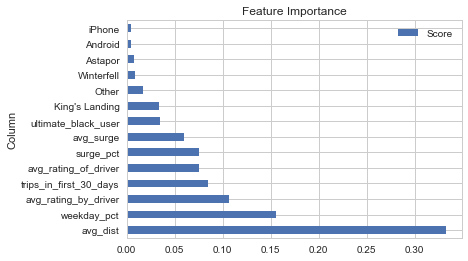

In [56]:
headers = ['Column', 'Score']
values = sorted(zip(X.columns, rfc.feature_importances_), key=lambda x:x[1]*-1)

df_rfc = pd.DataFrame(data=values, columns=headers).set_index('Column')
df_rfcs = df_rfc.sort_values(by='Score', ascending=False)
print (df_rfcs)

df_rfcs.plot(kind='barh')
plt.title('Feature Importance')

In [57]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [58]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [59]:
ada.score(X_test,y_test)

0.7245

In [60]:
gbs = GradientBoostingClassifier(n_estimators=100)
gbs.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [61]:
gbs.score(X_test,y_test)

0.7754

In [62]:
features = list(zip(X_train.columns, gbs.feature_importances_))
features

[('avg_dist', 0.11580571858007595),
 ('avg_rating_by_driver', 0.11094280745779633),
 ('avg_rating_of_driver', 0.055332011035950215),
 ('avg_surge', 0.05081110232763378),
 ('surge_pct', 0.15605479771083208),
 ('trips_in_first_30_days', 0.1427812246240338),
 ('ultimate_black_user', 0.0644508485607877),
 ('weekday_pct', 0.18420500820193797),
 ('Astapor', 0.021494567647798574),
 ("King's Landing", 0.033223697557010407),
 ('Winterfell', 0.0),
 ('Android', 0.020097554691920608),
 ('Other', 0.04311316752253869),
 ('iPhone', 0.0016874940816839162)]

                           Score
Column                          
weekday_pct             0.184205
surge_pct               0.156055
trips_in_first_30_days  0.142781
avg_dist                0.115806
avg_rating_by_driver    0.110943
ultimate_black_user     0.064451
avg_rating_of_driver    0.055332
avg_surge               0.050811
Other                   0.043113
King's Landing          0.033224
Astapor                 0.021495
Android                 0.020098
iPhone                  0.001687
Winterfell              0.000000


Text(0.5,1,'Feature Importance')

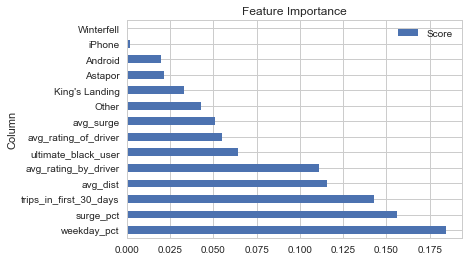

In [63]:
headers = ['Column', 'Score']
values = sorted(zip(X.columns, gbs.feature_importances_), key=lambda x:x[1]*-1)

df_gbs = pd.DataFrame(data=values, columns=headers).set_index('Column')
df_gbs=df_gbs.sort_values(by='Score', ascending=False)
print (df_gbs)
df_gbs.plot(kind='barh')
plt.title('Feature Importance')
    

In [64]:
# taking top 7 features only
X_train_topFeatures = X_train.drop(["avg_surge","iPhone","Android","Winterfell","Astapor","Other","King's Landing","Other"],axis=1)
X_test_topFeatures = X_test.drop(["avg_surge","iPhone","Android","Winterfell","Astapor","Other","King's Landing","Other"],axis=1)

In [65]:
X_train_topFeatures.shape,X_test_topFeatures.shape ,  y_train.shape, y_test.shape

((40000, 7), (10000, 7), (40000,), (10000,))

In [66]:
random_seed = 21

# minimum number of samples required at each leaf node
min_samples_leaf = [10, 30, 50, 70]
# number of trees
n_estimators = [100, 200, 300]
# minimum number of samples required to split a node
min_samples_split = [100, 300, 500]

# create the parameter grid based on the results of random search 
gb_params = {'min_samples_leaf': min_samples_leaf,
             'min_samples_split': min_samples_split, 
             'n_estimators': n_estimators}

gb = GradientBoostingClassifier(learning_rate = 0.05, max_features = 'sqrt', max_depth = 6, 
                                   subsample = 0.8, random_state=random_seed, warm_start=True)
gs = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1, verbose=1)
gs_Model = gs.fit(X_train_topFeatures,  y_train)
gb_best_est = gs_Model.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 10.6min finished


In [67]:
gb_best_est.score(X_train_topFeatures,y_train)



0.781

In [68]:
y_pred = gb_best_est.predict(X_test_topFeatures)


In [69]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81      6219
          1       0.71      0.59      0.64      3781

avg / total       0.75      0.75      0.75     10000



In [70]:
score_tab = pd.DataFrame(columns=["train-score", "test-score", "classifier-type"])
def add_score(cls_name,cls,cls_type,X_tr,X_tes):
    score_tab.loc[cls_name,"train-score"] = cls.score(X_tr,y_train)
    score_tab.loc[cls_name,"test-score"] = cls.score(X_tes,y_test)
    score_tab.loc[cls_name,"classifier-type"] = cls_type
    

In [71]:
add_score("mnb", mnb,"Naive Bayes",X_train,X_test)
add_score("rfc",rfc,"Random Forest",X_train,X_test)
add_score("ada",ada,"Ada Boost",X_train,X_test)
add_score("gbs",gbs, "Gradient Boost",X_train,X_test)
add_score("gbs_less", gb_best_est,"Gradient Boost",X_train_topFeatures,X_test_topFeatures)
score_tab

,train-score,test-score,classifier-type
mnb,0.665675,0.6652,Naive Bayes
rfc,0.97155,0.7319,Random Forest
ada,0.9915,0.7245,Ada Boost
gbs,0.777975,0.7754,Gradient Boost
gbs_less,0.781,0.7547,Gradient Boost


Conclusion :

After the initial data cleanup and analysis, the dependent variable was fixed as the  active_status of the user in the system. This was decided based on whether the user had used the service in the last 30 days preceding the pull out of data.
The % of active users came out to be only 37%. 

Further to that visualized various features with respect to active/inactive and gained some insights. For example, city "King's Landing" suggests strongly in favor of user being active.

Then I moved on to developing models and use the given data to predict a user being active or not. I applied boosting models that uses a large number of weak classifiers that are very different from each other.

I also graded by important features as well as applying feature importance

Finally I decide to take the Gradient Boost model with only top 7 features i.e. 'weekday_pct', 'surge_pct', 'trips_in_first_30_days', 'avg_dist', 'avg_rating_by_driver', "King's Landing", 'ultimate_black_user'. But that did not improve the prediction score significantly.

It can be seen that  Gradient Boost model provides accuracy of 0.77 for the test data. So for future data of users we can accurately predict if he/she is active as many as 77% times.

To improve the rider retention:

We may pay more attention to weekday service as compared to weekends. Proabably it means that weekday trips are more important for a user to become at active user. It makes sense, because users use weekday service more regularly then weekends, which may be more irregular.

We might pay special attention to riders who have higher surge_pct.

And further investigation should be made as how "King's Landing" city is different from others. Maybe King's Landing has high parking fees or less space for parking, that users end up doing daily commute on Ultimate's services.

Observations :
    Weekday_pct seems to be the most important feature with more than 17%, closely followed by surge_pct.
    Trips in first 30 days, average distance  and averrage rating given by the driver are also above 10 %.